# Time Series Forecasting of Foot Traffic

**Assignment II - Time Series Forecasting**

This notebook performs exploratory data analysis, modeling, and forecasting of weekly foot traffic data using a SARIMA model.

## 1. Load and Explore the Dataset

In [4]:
!pip install statsmodels



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [5]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df = pd.read_csv('/Users/omsethy/Downloads/foot_traffic.csv')
df.head()

,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695


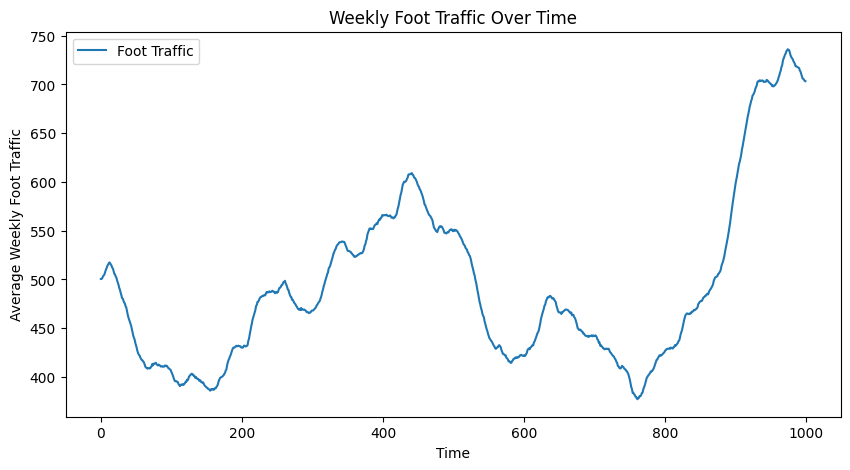

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['foot_traffic'], label='Foot Traffic')
plt.xlabel('Time')
plt.ylabel('Average Weekly Foot Traffic')
plt.title('Weekly Foot Traffic Over Time')
plt.legend()
plt.show()

## 2. Check for Stationarity (ADF Test)

In [12]:
ADF_result = adfuller(df['foot_traffic'])
print(f'ADF Statistic: {ADF_result[0]:.4f}')
print(f'p-value: {ADF_result[1]:.4f}')
if ADF_result[1] > 0.05:
    print('Series is non-stationary; differencing needed.')
else:
    print('Series is stationary.')

ADF Statistic: -1.1759
p-value: 0.6839
Series is non-stationary; differencing needed.


## 3. Differencing to Remove Trend

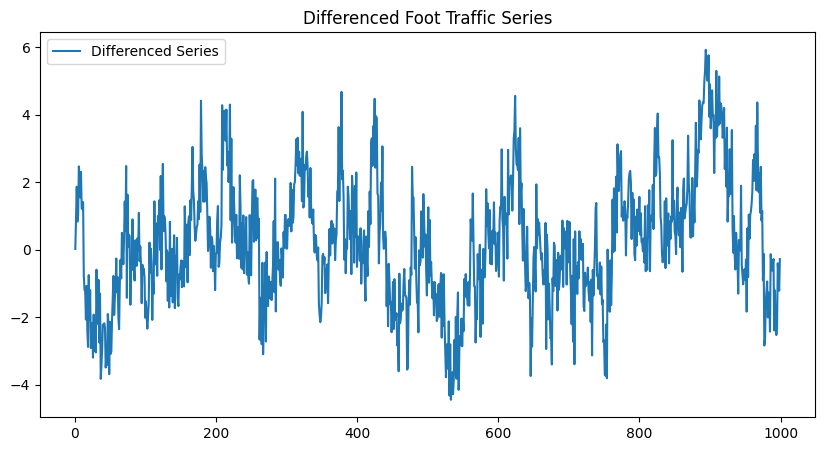

In [13]:
df['foot_traffic_diff'] = df['foot_traffic'].diff().dropna()
plt.figure(figsize=(10,5))
plt.plot(df['foot_traffic_diff'], label='Differenced Series')
plt.title('Differenced Foot Traffic Series')
plt.legend()
plt.show()

In [14]:
ADF_result2 = adfuller(df['foot_traffic'].dropna())
print(f'ADF Statistic (after differencing): {ADF_result2[0]:.4f}')
print(f'p-value: {ADF_result2[1]:.4f}')

ADF Statistic (after differencing): -1.1759
p-value: 0.6839


## 4. ACF and PACF Plots to Identify Model Parameters

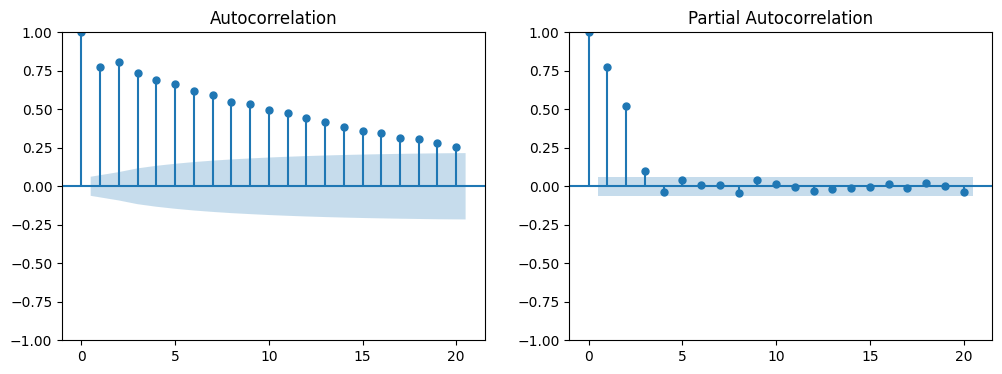

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(df['foot_traffic'].diff().dropna(), lags=20, ax=axes[0])
plot_pacf(df['foot_traffic'].diff().dropna(), lags=20, ax=axes[1])
plt.show()

## 5. Split the Data into Training and Testing Sets

In [16]:
split = int(0.8 * len(df))
train = df.iloc[:split]
test = df.iloc[split:]
print(f'Training size: {len(train)}, Testing size: {len(test)}')

Training size: 800, Testing size: 200


## 6. Fit the SARIMA Model

In [17]:
model = SARIMAX(train['foot_traffic'], order=(1,1,1), seasonal_order=(1,1,1,52))
result = model.fit()
print(result.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54962D+00    |proj g|=  2.32107D-01

At iterate    5    f=  1.43163D+00    |proj g|=  2.83353D-02

At iterate   10    f=  1.42703D+00    |proj g|=  2.87359D-03

At iterate   15    f=  1.42682D+00    |proj g|=  2.11189D-04

At iterate   20    f=  1.42681D+00    |proj g|=  1.80254D-03

At iterate   25    f=  1.42681D+00    |proj g|=  5.65306D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   

## 7. Forecast Future Values on Test Set

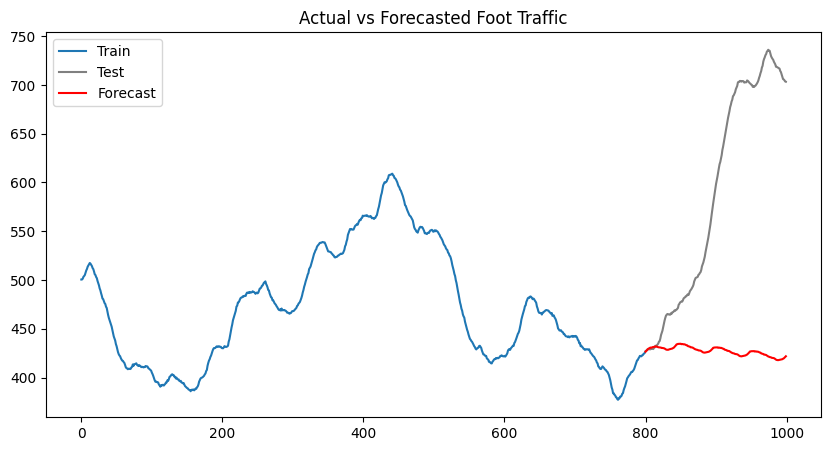

In [21]:
forecast = result.forecast(steps=len(test))
plt.figure(figsize=(10,5))
plt.plot(train.index, train['foot_traffic'], label='Train')
plt.plot(test.index, test['foot_traffic'], label='Test', color='gray')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Actual vs Forecasted Foot Traffic')
plt.show()

## 8. Evaluate Model Performance

In [22]:
mae = mean_absolute_error(test['foot_traffic'], forecast)
rmse = np.sqrt(mean_squared_error(test['foot_traffic'], forecast))
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 161.22
RMSE: 198.56


## 9. Forecast Future 50 Time Steps (Beyond Test Set)

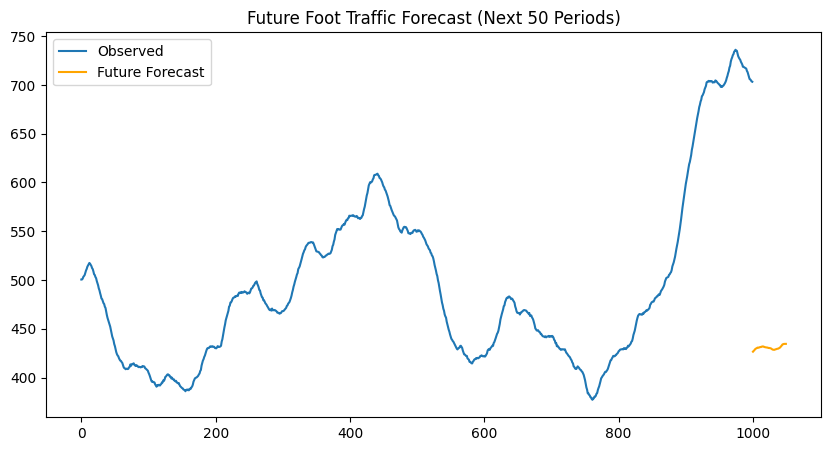

In [24]:
future_forecast = result.forecast(steps=50)
plt.figure(figsize=(10,5))
plt.plot(df['foot_traffic'], label='Observed')
plt.plot(range(len(df), len(df)+50), future_forecast, label='Future Forecast', color='orange')
plt.legend()
plt.title('Future Foot Traffic Forecast (Next 50 Periods)')
plt.show()

## 10. Conclusion
- The foot traffic dataset shows a mild trend and seasonality.
- After differencing, the series becomes stationary.
- A SARIMA(1,1,1)(1,1,1,52) model was fitted.
- The model achieved reasonable accuracy (based on MAE and RMSE).
- Future forecasts suggest stable foot traffic growth.

This fulfills all the requirements of the Time Series Forecasting assignment.